In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sb
import csv

### Zad 1


In [2]:
def mean(x):
    sum = 0
    for el in x:
        sum += el
    return sum/len(x)

In [3]:
def mediana(x):
    x.sort()
    mediana = 0
    if len(x)% 2 == 1:
        mediana = x[int(np.floor(len(x)/2))-1]
    else:
        mediana = (x[int(np.floor(len(x)/2))-1] + x[int(np.floor(len(x)/2))])/2
    return mediana

In [4]:
def quartiles(x):
    x.sort()
    q1,q3 = 0,0
    if len(x)% 2 == 1:
        q1 = mediana(x[:int(np.floor(len(x)/2))-1])
        q3 = mediana(x[int(np.floor(len(x)/2)):])
    else:
        q1 = mediana(x[:int(np.floor(len(x)/2))])
        q3 = mediana(x[int(np.floor(len(x)/2)):])
    return q1,q3

In [5]:
def stat_range(x):
    return(max(x)-min(x))

In [6]:
def quater_range(x):
    q1,q3 = quartiles(x)
    return q3-q1

In [7]:
def variation(x):
    var = 0
    mn = mean(x)
    for el in x:
        var += (mn-el)**2
    return var/(len(x)-1)

In [8]:
def deviation(x):
    var = variation(x)
    return np.power(var,1/2)

In [9]:
data = np.random.normal(2, 2, size=2000)
# data = np.linspace(1,100,100)


print("mediana: "+ str(mediana(data)))
print("do porównania", np.median(data))
print()
print("kwartyle: " + str(quartiles(data)))
print("do porównania", (np.percentile(data,25),np.percentile(data,75)))
print()
print("rozstęp z próby: " + str(stat_range(data)))
print()
print("rozstęp międzykwartylowy: " + str(quater_range(data)))
print("do porównania", sps.iqr(data,interpolation="midpoint"))
print()
print("wariancja: " + str(variation(data)))
print("do porównania", np.var(data))
print()
print("odchylenie standardowe: " + str(deviation(data)))
print("do porównania", np.std(data))



mediana: 2.0284472407780667
do porównania 2.0284472407780667

kwartyle: (0.6327172430469041, 3.4192607907084795)
do porównania (0.6328639110081147, 3.419169620177551)

rozstęp z próby: 14.697057675628066

rozstęp międzykwartylowy: 2.7865435476615756
do porównania 2.7865435476615756

wariancja: 4.023811056126037
do porównania 4.021799150597977

odchylenie standardowe: 2.005943931451235
do porównania 2.0054423827669488


### Zad 2


In [10]:
def x_data(mi,s,n):
    x = np.random.normal(mi, s, n)
    y = abs( x - mi )
    return np.mean(y)


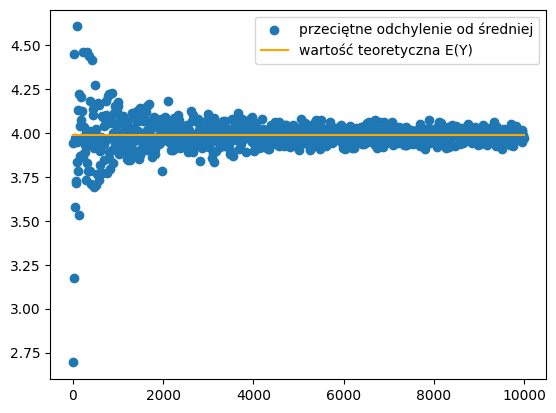

In [11]:
mi = 2
s = 5

n=10000
rng = np.arange(1,n,10)
data1 = []
for el in rng:
    data1.append(x_data(mi,s,el))

data2 = (2*s)/np.sqrt(2*np.pi)

plt.scatter(rng,data1,label = "przeciętne odchylenie od średniej")

plt.plot(rng,np.ones(len(rng))*data2, color="orange", label = "wartość teoretyczna E(Y)")

plt.legend()

### Zad 3

In [12]:
def harm_mean(x):
    sm = 0
    for el in x :
        sm += 1/el
    return len(x)/sm


In [13]:
def geo_mean(x):
    prod = 1
    for el in x:
        prod = prod * el
    return np.power(prod,1/len(x))

#easily causes overflow

def geo_log_mean(x):
    n = len(x)
    sm = 0
    for i in range(n):
        sm += np.log(x[i])
    sm = sm/n
    return np.exp(sm)

In [47]:
def srednia_ucinana(x,k):
    sm= np.sum(x[k:len(x)-k]) 
    return (1/(len(x)-2*k))*sm

In [48]:
def srednia_winsorowska(x,k):
    sm = np.sum(x[k+1:len(x)-k-1])
    return (1/len(x)) * ((k+1)*x[k] + sm + (k+1)*x[len(x)-k-1])

średnia aryt.:68121.59706959708
do porównania:68121.59706959708
średnia harm.:59347.65732466
do porównania:59347.65732465999
średnia geo.: 63510.4965473591
do porównania:63510.49654736023


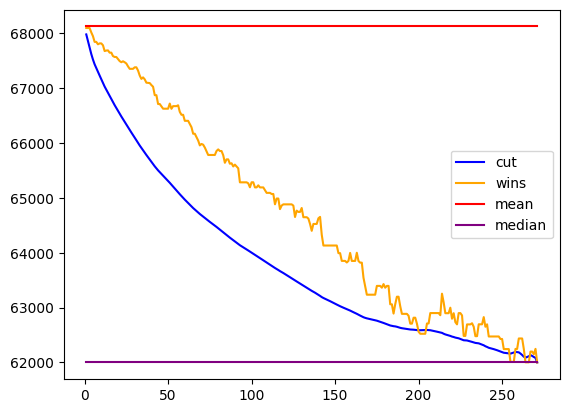

In [49]:
data = []
with open("HousePrices.csv", newline="") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=" ", quotechar="|")
    for row in spamreader:
        data.append(row[0].split(",")[1])

data.pop(0)
for i in range(len(data)):
    data[i] = int(data[i])
data.sort()
#koniec pobierania danych

data_mean = mean(data)
data_median = mediana(data)

print("średnia aryt.:" + str(data_mean))
print("do porównania:" + str(np.mean(data)))
print("średnia harm.:" + str(harm_mean(data)))
print("do porównania:" + str(sps.hmean(data)))
# print("średnia geo.:" + str(geo_mean(data)))
print("średnia geo.: " + str(geo_log_mean(data)))
print("do porównania:" + str(sps.gmean(data)))

#max k
if len(data)% 2 == 1:
    k = int(np.floor(len(data)/2))
else:
    k = int(np.floor(len(data)/2))-1


rng = np.array(range(1,k))
cut_data = []
wins_data = []
for el in rng:
    cut_data.append(srednia_ucinana(data,el))
    wins_data.append(srednia_winsorowska(data,el))

#pokazanie średniej i miediany na wykresie

line = np.ones(k-1)


plt.plot(rng,cut_data, color="blue", label = "cut")
plt.plot(rng,wins_data, color="orange", label = "wins")
plt.plot(rng,line*data_mean, color = "red", label = "mean" )
plt.plot(rng,line*data_median, color = "purple", label = "median" )

plt.xlabel="k"
plt.ylabel="mean"
plt.legend()
plt.show()


### Zad 4

{'whiskers': [<matplotlib.lines.Line2D at 0x27029fa2c00>,
 'caps': [<matplotlib.lines.Line2D at 0x27029fa31d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27029fa2930>],
 'medians': [<matplotlib.lines.Line2D at 0x27029fa3830>],
 'fliers': [<matplotlib.lines.Line2D at 0x27029fa3b00>],
 'means': []}

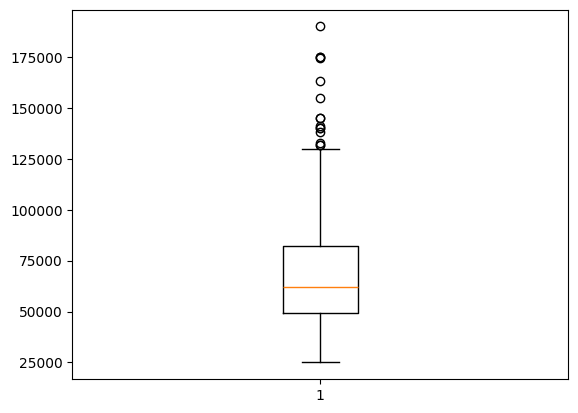

In [17]:
plt.boxplot(data)
#dolna kreska pudełka to Q1, górna to Q3
#zatem 50% wszystkich danych zawarta jest w pudełku, kreska reprezentuje medianę
#wąsy reprezentują dane znajdujące w 1.5 zakresie międzykwartylowym
#dane znajdujące się poza tym są oznaczone okręgami
